# Generate a world-wide grid, and the features for each point

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import jusipy

In [7]:
GLCF = jusipy.latlong_features.GLCF(resolution='8km')
CLL = jusipy.GIS.CountryLatLong()

In [14]:
land_grid = pd.DataFrame(jusipy.GIS.sample.grid_latlong(land=True, glcf=GLCF, lat_points=500),
                         columns=['lat', 'long'])
land_grid_countries = CLL.get(list(land_grid.values))
land_grid['country'] = land_grid_countries
land_grid_wrong = land_grid[pd.isna(land_grid.country)]
land_grid = land_grid[~pd.isna(land_grid.country)]
land_grid.to_pickle('data/grid_500.pkl')

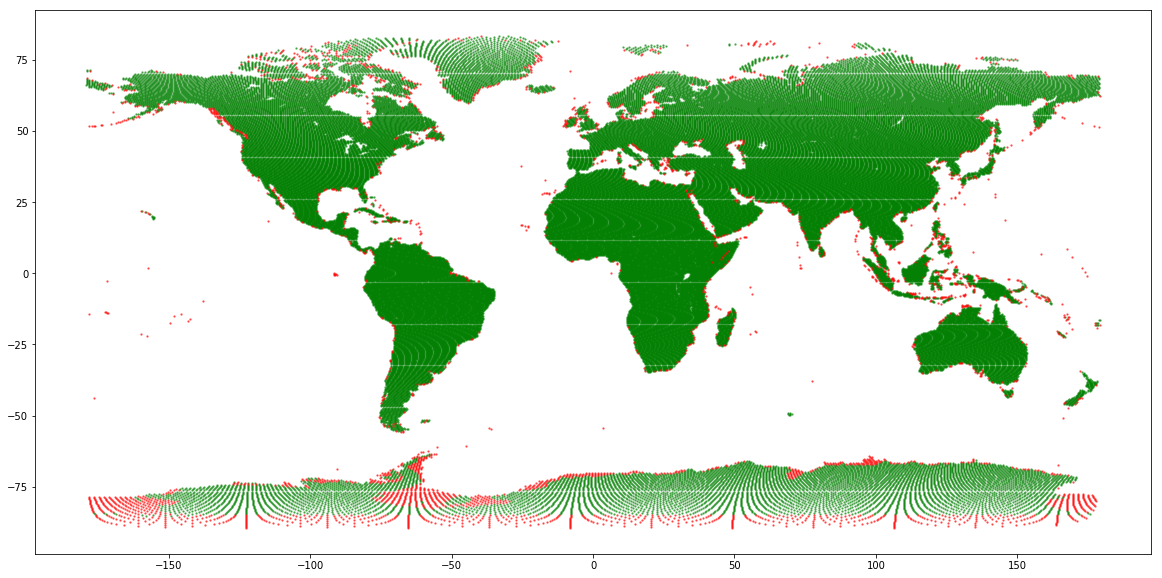

In [15]:
plt.figure(figsize=(20,10))
plt.scatter(land_grid.long, land_grid.lat, s=2, c='g', alpha=0.5, zorder=1)
plt.scatter(land_grid_wrong.long, land_grid_wrong.lat, s=2, c='r', alpha=0.5, zorder=2)

In [32]:
land_grid = pd.read_pickle('data/grid_500.pkl')
A_features = jusipy.latlong_features.All()
#ne = jusipy.latlong_features.NaturalEarth()
#country_features = jusipy.country_features.get(all_points, A_country)
latlong_features = jusipy.latlong_features.get(land_grid, A_features, pixel_window=10)

Loading GLCF(8km)                                                                                                     reas)                                                                                                    

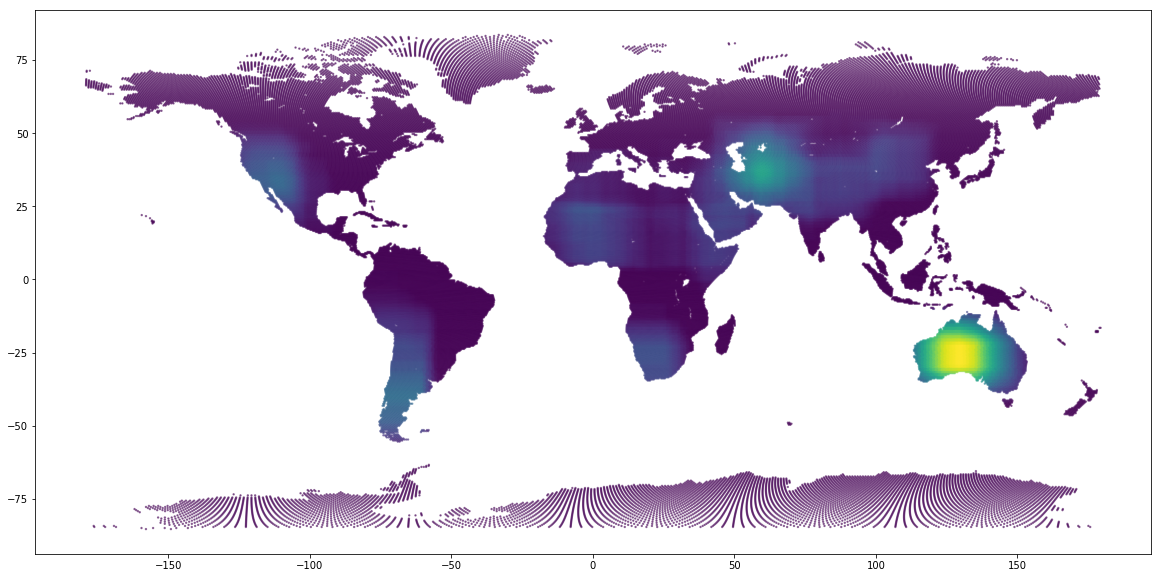

In [42]:
plt.figure(figsize=(20,10))
plt.scatter(land_grid.long, land_grid.lat, s=2, c=latlong_features['Shrubs and Bare Ground'].values, alpha=0.5)

In [21]:
land_grid.to_pickle('data/grid_500.pkl')

In [37]:
latlong_features.columns

Index(['nearest_airport', 'nearest_port', 'nearest_roads', 'nearest_railroad',
       'nearest_urban_area', 'Water', 'Broadleaf Evergreen Forest',
       'Coniferous Evergreen Forest and Woodland',
       'High latitude Deciduous Forest and Woodland', 'Tundra',
       'Mixed Coniferous Forest and Woodland', 'Wooded Grassland', 'Grassland',
       'Bare Ground', 'Shrubs and Bare Ground', 'Cultivated Crops',
       'Broadleaf Deciduous Forest and Woodland', 'Data Unavailable', 'Water2',
       'Evergreen Needleleaf Forest', 'Evergreen Broadleaf Forest',
       'Deciduous Needleleaf Forest', 'Deciduous Broadleaf Forest',
       'Mixed Forest', 'Woodland', 'Wooded Grassland2', 'Closed Shrubland',
       'Open Shrubland', 'Grassland2', 'Cropland', 'Bare Ground2',
       'Permanent snow and ice', 'coding_error_do_not_use_feature'],
      dtype='object')

In [27]:
import umap

In [28]:
umap

<module 'umap' from '/Users/thiesgehrmann/miniconda3/lib/python3.6/site-packages/umap/__init__.py'>